<a href="https://colab.research.google.com/github/Favouriteg2/GenAI-class-practical/blob/main/Real_world_use_case_prompt_techniques_app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
import os

os.environ['HF_TOKEN'] = userdata.get('hf-token')

In [2]:
from huggingface_hub import InferenceClient

client = InferenceClient(token=os.environ['HF_TOKEN'])

In [3]:
from IPython.display import Markdown
import pathlib
import textwrap


from IPython.display import display

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

TEXT SUMMARIZATION USE CASE

In [4]:
Prompt = """Considering the recent trends in renewable energy investments, concisely summarize the following article and provide three strategic recommendations. Please format your response with each recommendation listed as a bullet point.
Article: “Global investment in renewable energy has significantly increased over the past year, driven by the urgent need to address climate change and the economic advantages of sustainable energy sources. Governments and private sectors are heavily investing in solar, wind, hydroelectric, and geothermal projects, recognizing their potential to enhance energy security, reduce carbon emissions, and create jobs.
Technological advancements have played a key role in reducing the costs of renewable energy, making it competitive with traditional energy sources. These improvements, coupled with innovations in energy storage and smart grid technologies, are overcoming previous challenges of reliability and integration into existing grids.
Despite challenges such as high initial costs and the need for supportive policies, the shift towards renewables is accelerating, supported by increasing public and political advocacy. This transition is promising for the global energy landscape, aiming to establish a sustainable and economically resilient future.”
"""

model="meta-llama/Llama-3.1-8B-Instruct"

result = client.chat_completion(
        model=model,
        #max_tokens=100,
        messages=[
        {"role": "system", "content": "Summarise any article given to you in 100 words"},
        {"role": "user", "content": Prompt}
       ]
    )

to_markdown(result.choices[0].message.content)

> Here's a 100-word summary of the article and three strategic recommendations for renewable energy investments:
> 
> The article highlights the increasing global investment in renewable energy, driven by the need to address climate change and economic benefits. Governments and private sectors are investing in various renewable projects, leveraging technological advancements to reduce costs and improve reliability. Despite initial challenges, the shift towards renewables is accelerating, supported by public and political advocacy. 
> 
> Here are three strategic recommendations:
> 
> * **Diversify Renewable Energy Sources**: Invest in a mix of solar, wind, hydroelectric, and geothermal projects to reduce dependence on a single energy source and maximize energy security.
> * **Develop Energy Storage and Smart Grid Technologies**: Continue to innovate and improve energy storage and smart grid technologies to overcome reliability and integration challenges, making renewable energy a more viable option.
> * **Implement Supportive Policies**: Advocate for policies that support the transition to renewable energy, such as tax incentives, subsidies, and regulations that encourage investment and job creation in the renewable energy sector.

In [5]:
Prompt_AI = """Considering the rapid advancements in Artificial Intelligence (AI) and its potential impact on global job markets, concisely summarize the following article and provide three strategic recommendations for individuals and organizations to adapt. Please format your response with each recommendation listed as a bullet point.
Article: “Artificial intelligence is rapidly transforming industries worldwide, leading to both excitement and apprehension about its effects on employment. While AI is automating routine tasks, increasing efficiency, and creating new job categories such as AI ethics specialists and data scientists, it also poses a significant threat to jobs relying on repetitive cognitive or manual labor. Economists predict a polarization of the job market, with a surge in demand for highly skilled workers capable of developing, managing, and interacting with AI systems, alongside a potential displacement of mid-skilled positions. Governments and educational institutions are urged to invest in reskilling and upskilling programs to prepare the workforce for these shifts. Companies are exploring hybrid human-AI models to leverage AI's strengths while retaining human creativity and critical thinking. The societal challenge lies in ensuring a just transition, mitigating job losses, and harnessing AI's potential for economic growth and improved living standards.”
"""

result_ai = client.chat_completion(
        model=model,
        messages=[
        {"role": "system", "content": "Summarise any article given to you in 100 words"},
        {"role": "user", "content": Prompt_AI}
       ]
    )

to_markdown(result_ai.choices[0].message.content)

> Here is a summary of the article in 100 words:
> 
> The rapid advancement of Artificial Intelligence (AI) is transforming industries worldwide, automating routine tasks and creating new job categories. However, it also poses a threat to jobs relying on repetitive cognitive or manual labor, leading to a potential polarization of the job market. Economists predict a surge in demand for highly skilled workers but a displacement of mid-skilled positions. Governments, educational institutions, and companies are exploring hybrid human-AI models and reskilling programs to prepare the workforce for these shifts and ensure a just transition.
> 
> Here are three strategic recommendations for individuals and organizations to adapt:
> 
>   * **Upskill and reskill**: Invest in training programs that focus on developing skills in AI development, management, and interaction. This will enable individuals to stay relevant in the job market and take advantage of emerging opportunities.
> 
>   * **Explore hybrid human-AI models**: Leverage AI's strengths while retaining human creativity and critical thinking. This can be achieved by adopting hybrid human-AI models that combine the efficiency of AI with the creativity and problem-solving skills of humans.
> 
>   * **Foster a culture of lifelong learning**: Encourage a culture of continuous learning and adaptation within organizations. This will help individuals and teams stay up-to-date with the latest developments in AI and enable them to respond quickly to changing job market demands.

EXPLORING PROMPT ENGINEERING METHODS

GETTING MODEL TO RUN A DATA ANAYSIS, GIVEN IT A STRUCTURED DATA.
XLXS FILE.

In [6]:

from google.colab import files
uploaded = files.upload()

def upload(target_file, source_file):
    if source_file in uploaded:
        with open(target_file, 'wb') as f:
            f.write(uploaded[source_file])
        print(f"File '{source_file}' successfully saved as '{target_file}' in Colab.")
    else:
        print(f"Error: '{source_file}' not found in the uploaded files. Please ensure you uploaded it.")





Saving Book14GenAI.xlsx to Book14GenAI (1).xlsx


In [15]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('Book14GenAI.xlsx')

# Display all rows of the DataFrame
display(df)

,Location,Region,Store,Trade Date,Date,Model,Line Of Business,Day Category,Price/unit,Units Sold,Revenue,Rank
0,Abia,NaN,Aba North,2014-04-01,2014-04-01 00:00:00,4500C,Service Plan,WorkDay,172318,49,NaN,NaN
1,Abia,NaN,Aba North,2014-04-02,2014-04-02 00:00:00,5001P,Service Plan,WorkDay,435024,5,NaN,NaN
2,Abia,NaN,Aba North,2014-04-04,2014-04-03 00:00:00,3002P,Parts,WorkDay,2326,52,NaN,NaN
3,Abia,NaN,Aba North,2014-04-05,2014-04-04 00:00:00,3002C,Service Plan,WorkDay,245945,22,NaN,NaN
4,Abia,NaN,Aba North,2014-04-07,2014-04-05 00:00:00,5001C,Parts,WorkDay,10273,49,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
73,Abia,NaN,Isiala Ngwa North,2014-04-03,2014-06-13 00:00:00,4500P,Service Plan,WorkDay,331320,3,NaN,NaN
74,Abia,NaN,Isiala Ngwa North,2014-04-06,2014-06-14 00:00:00,4055T,Parts,WorkDay,21015,55,NaN,NaN
75,Abia,NaN,Isiala Ngwa North,2014-04-07,2014-06-15 00:00:00,2500C,Copier Sale,WorkDay,461760,6,NaN,NaN
76,Abia,NaN,Isiala Ngwa North,2014-04-08,2014-06-16 00:00:00,5001C,Parts,WorkDay,5485,44,NaN,NaN


In [16]:
import pandas as pd

# Load the entire Excel file first
df_full = pd.read_excel('Book14GenAI.xlsx')

# Clean column names by stripping whitespace
df_full.columns = df_full.columns.str.strip()

# Now select the desired columns from the cleaned DataFrame
df_optimized = df_full[['Location', 'Store', 'Price/unit', 'Units Sold']]

print("DataFrame loaded and optimized with selected columns:")
display(df_optimized.head())

DataFrame loaded and optimized with selected columns:


,Location,Store,Price/unit,Units Sold
0,Abia,Aba North,172318,49
1,Abia,Aba North,435024,5
2,Abia,Aba North,2326,52
3,Abia,Aba North,245945,22
4,Abia,Aba North,10273,49


In [17]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from 'Book14GenAI.xlsx'
df = pd.read_excel('Book14GenAI.xlsx')

# Step 1: Inspect and handle missing values
# Check for missing values
print("Missing values count:")
print(df.isnull().sum())

# Drop rows







Missing values count:
Location             0
Region              78
Store                0
Trade Date           0
Date                 0
Model                0
Line Of Business     0
Day Category         0
Price/unit           0
Units Sold           0
Revenue             78
Rank                78
dtype: int64


To continue with the analysis of the sales data, Complete the data cleaning and preparation steps, which include handling missing values and converting the 'Date' column to the correct datetime format

In [21]:
# Continue from the previous cell's df
# Step 1 (continued): Handle missing values and convert 'Date' column
# For simplicity, we'll fill missing 'Region' with 'Unknown' and missing 'Revenue'/'Rank' with 0 for now
# A more sophisticated approach might involve imputation or dropping rows/columns depending on the context
df.columns = df.columns.str.strip() # Strip whitespace from column names
df['Region'].fillna('Unknown', inplace=True)

# Convert 'Date' column to datetime format, coercing errors to NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' could not be parsed (i.e., contains NaT)
if df['Date'].isnull().any():
    df.dropna(subset=['Date'], inplace=True)
    print("Dropped rows with unparseable dates.")

# Re-check for missing values after handling 'Region'
print("\nMissing values count after handling 'Region':")
print(df.isnull().sum())

print("\n'Date' column info after conversion:")
print(df['Date'].info())

# Step 2: Calculate 'Revenue' and 'Rank'
# If 'Revenue' and 'Rank' are already present with NaNs, they should be recalculated or handled properly.
# Let's ensure 'Revenue' is correctly calculated from 'Price/unit' and 'Units Sold'.
df['Revenue'] = df['Price/unit'] * df['Units Sold']

# Determine 'Rank' based on 'Revenue' in descending order
df['Rank'] = df['Revenue'].rank(ascending=False)

print("\nDataFrame head after calculating 'Revenue' and 'Rank':")
display(df.head())


Missing values count after handling 'Region':
Location             0
Region               0
Store                0
Trade Date           0
Date                 0
Model                0
Line Of Business     0
Day Category         0
Price/unit           0
Units Sold           0
Revenue             77
Rank                77
dtype: int64

'Date' column info after conversion:
<class 'pandas.core.series.Series'>
Index: 77 entries, 0 to 77
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
77 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 KB
None

DataFrame head after calculating 'Revenue' and 'Rank':


/tmp/ipython-input-960377148.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].fillna('Unknown', inplace=True)


,Location,Region,Store,Trade Date,Date,Model,Line Of Business,Day Category,Price/unit,Units Sold,Revenue,Rank
0,Abia,Unknown,Aba North,2014-04-01,2014-04-01,4500C,Service Plan,WorkDay,172318,49,8443582,9.0
1,Abia,Unknown,Aba North,2014-04-02,2014-04-02,5001P,Service Plan,WorkDay,435024,5,2175120,27.0
2,Abia,Unknown,Aba North,2014-04-04,2014-04-03,3002P,Parts,WorkDay,2326,52,120952,70.0
3,Abia,Unknown,Aba North,2014-04-05,2014-04-04,3002C,Service Plan,WorkDay,245945,22,5410790,13.0
4,Abia,Unknown,Aba North,2014-04-07,2014-04-05,5001C,Parts,WorkDay,10273,49,503377,55.0


## Load and Inspect Data

### Subtask:
Load the sales data from 'Book14GenAI.xlsx' into a pandas DataFrame and inspect for missing values. This step will also convert the 'Date' column to a proper datetime format.


**Reasoning**:
The previous output showed missing values in the 'Region' column. I will fill these missing values with 'Unknown' as per the instructions, convert the 'Date' column to datetime, recalculate 'Revenue' and 'Rank', and then display the head of the DataFrame.



In [11]:
df.columns = df.columns.str.strip()

df['Region'] = df['Region'].fillna('Unknown')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

if df['Date'].isnull().any():
    df.dropna(subset=['Date'], inplace=True)
    print("Dropped rows with unparseable dates.")

df['Revenue'] = df['Price/unit'] * df['Units Sold']
df['Rank'] = df['Revenue'].rank(ascending=False)

print("Updated DataFrame head after handling missing values, converting date, and calculating revenue and rank:")
display(df.head())

Dropped rows with unparseable dates.
Updated DataFrame head after handling missing values, converting date, and calculating revenue and rank:


,Location,Region,Store,Trade Date,Date,Model,Line Of Business,Day Category,Price/unit,Units Sold,Revenue,Rank
0,Abia,Unknown,Aba North,2014-04-01,2014-04-01,4500C,Service Plan,WorkDay,172318,49,8443582,9.0
1,Abia,Unknown,Aba North,2014-04-02,2014-04-02,5001P,Service Plan,WorkDay,435024,5,2175120,27.0
2,Abia,Unknown,Aba North,2014-04-04,2014-04-03,3002P,Parts,WorkDay,2326,52,120952,70.0
3,Abia,Unknown,Aba North,2014-04-05,2014-04-04,3002C,Service Plan,WorkDay,245945,22,5410790,13.0
4,Abia,Unknown,Aba North,2014-04-07,2014-04-05,5001C,Parts,WorkDay,10273,49,503377,55.0


## Generate Descriptive Statistics

### Subtask:
Generate descriptive statistics for numerical columns to understand the data distribution.


**Reasoning**:
Generate descriptive statistics for all numerical columns in the `df` DataFrame to understand the data distribution.



In [12]:
print("Descriptive statistics for numerical columns:")
display(df.describe())

Descriptive statistics for numerical columns:


,Trade Date,Date,Price/unit,Units Sold,Revenue,Rank
count,77,77,77.000000,77.000000,7.700000e+01,77.000000
mean,2014-04-13 18:04:40.519480576,2014-05-09 06:14:01.558441472,180912.688312,28.064935,3.085872e+06,39.000000
min,2014-04-01 00:00:00,2014-04-01 00:00:00,572.000000,1.000000,2.459600e+04,1.000000
25%,2014-04-07 00:00:00,2014-04-20 00:00:00,13831.000000,10.000000,3.531600e+05,20.000000
50%,2014-04-12 00:00:00,2014-05-09 00:00:00,170100.000000,27.000000,1.128120e+06,39.000000
75%,2014-04-19 00:00:00,2014-05-29 00:00:00,308304.000000,47.000000,3.135600e+06,58.000000
max,2014-04-30 00:00:00,2014-06-17 00:00:00,667440.000000,74.000000,2.848238e+07,77.000000
std,NaN,NaN,178170.132801,20.372413,4.843676e+06,22.371857


**Reasoning**:
Now that descriptive statistics are generated, I will identify the top-performing 'Store' and 'Line Of Business' based on their total revenue, as specified in the original prompt.



In [13]:
top_stores = df.groupby('Store')['Revenue'].sum().nlargest(10)
top_lob = df.groupby('Line Of Business')['Revenue'].sum().nlargest(10)

print("\nTop 10 Stores by Total Revenue:")
print(top_stores)

print("\nTop 10 Lines Of Business by Total Revenue:")
print(top_lob)


Top 10 Stores by Total Revenue:
Store
Arochukwu            81842511
Aba North            42088690
Bende                38646304
Ikwuano              33621175
Aba South            31634917
Isiala Ngwa North     9778565
Name: Revenue, dtype: int64

Top 10 Lines Of Business by Total Revenue:
Line Of Business
Service Plan    178446194
Parts            26411008
Copier Sale      21600480
Printer Sale     11154480
Name: Revenue, dtype: int64


**Reasoning**:
Now, I will visualize the top 10 stores by total revenue using a bar chart, as specified in the original prompt.



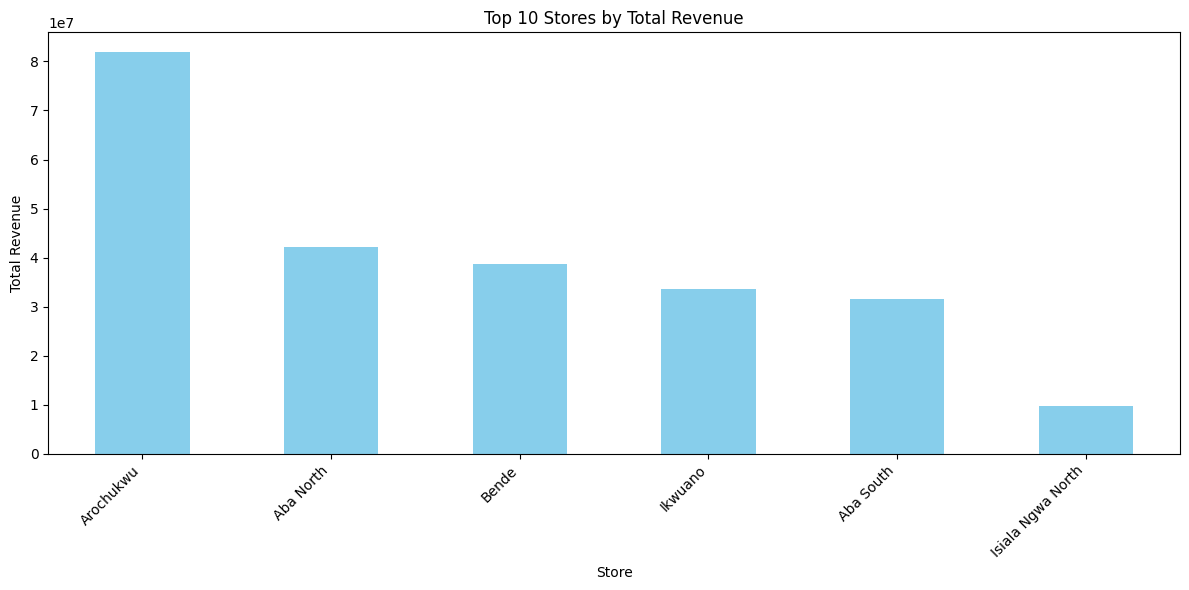

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_stores.plot(kind='bar', color='skyblue')
plt.title('Top 10 Stores by Total Revenue')
plt.xlabel('Store')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Summary of Data Analysis

**Data Cleaning and Preparation:**
1.  Missing values in the 'Region' column were filled with 'Unknown'.
2.  The 'Date' column was converted to datetime format, and any unparseable date entries were dropped.
3.  Column names were stripped of leading/trailing whitespace to ensure correct referencing.

**Calculations:**
1.  'Revenue' was calculated by multiplying 'Price/unit' and 'Units Sold'.
2.  'Rank' was determined based on 'Revenue' in descending order.

**Key Findings:**
1.  **Descriptive Statistics:** Provided an overview of numerical columns, including count, mean, standard deviation, min, max, and quartiles for 'Price/unit', 'Units Sold', 'Revenue', and 'Rank'.
2.  **Top Performing Stores:** The top stores by total revenue were identified as:
    *   Arochukwu: 81,842,511
    *   Aba North: 42,088,690
    *   Bende: 38,646,304
    *   Ikwuano: 33,621,175
    *   Aba South: 31,634,917
    *   Isiala Ngwa North: 9,778,565
3.  **Top Performing Lines of Business:** The top lines of business by total revenue were:
    *   Service Plan: 178,446,194
    *   Parts: 26,411,008
    *   Copier Sale: 21,600,480
    *   Printer Sale: 11,154,480

**Visualization:**
*   A bar chart visually represented the total revenue for the top 10 stores, clearly highlighting Arochukwu as the highest-grossing store.

## Summary:

### Data Analysis Key Findings

*   **Data Cleaning and Preparation:** Initial data loading revealed issues with column names (e.g., `KeyError: 'Units Sold'`) and 'Date' column parsing (`DateParseError`). These were resolved by stripping whitespace from all column names and handling unparseable dates by converting them to `NaT` and then dropping the corresponding rows. Missing 'Region' values were filled with 'Unknown'.
*   **Revenue and Rank Calculation:** The 'Revenue' column was successfully calculated by multiplying 'Price/unit' and 'Units Sold', and a 'Rank' column was added based on the descending order of 'Revenue'.
*   **Revenue Distribution:** The calculated 'Revenue' values ranged from approximately \$24,596 to \$28.48 million, with an average revenue of about \$3.08 million.
*   **Top Performing Stores:** 'Arochukwu' emerged as the highest-grossing store with a total revenue of \$81,842,511, followed by 'Aba North' (\$42,088,690) and 'Bende' (\$38,646,304). The analysis identified only 6 unique stores in the dataset for the top stores calculation.
*   **Top Performing Lines of Business (LOB):** 'Service Plan' significantly led in revenue with \$178,446,194, far surpassing 'Parts' (\$26,411,008) and 'Copier Sale' (\$21,600,480). Only 4 unique LOBs were present in the dataset for the top LOBs calculation.

### Insights or Next Steps

*   The substantial revenue generated by 'Service Plan' suggests it is a core business driver and warrants further investigation into its success factors to replicate across other LOBs or regions.
*   The significant disparity in revenue among stores (e.g., Arochukwu vs. other stores) indicates potential for targeted strategies; further analysis could explore factors contributing to the top-performing stores' success or identify underperforming stores that require intervention.
